# Quickstart
In this notebook, you will see the power of `porygon` plotting using Chicago traffic accident data. 

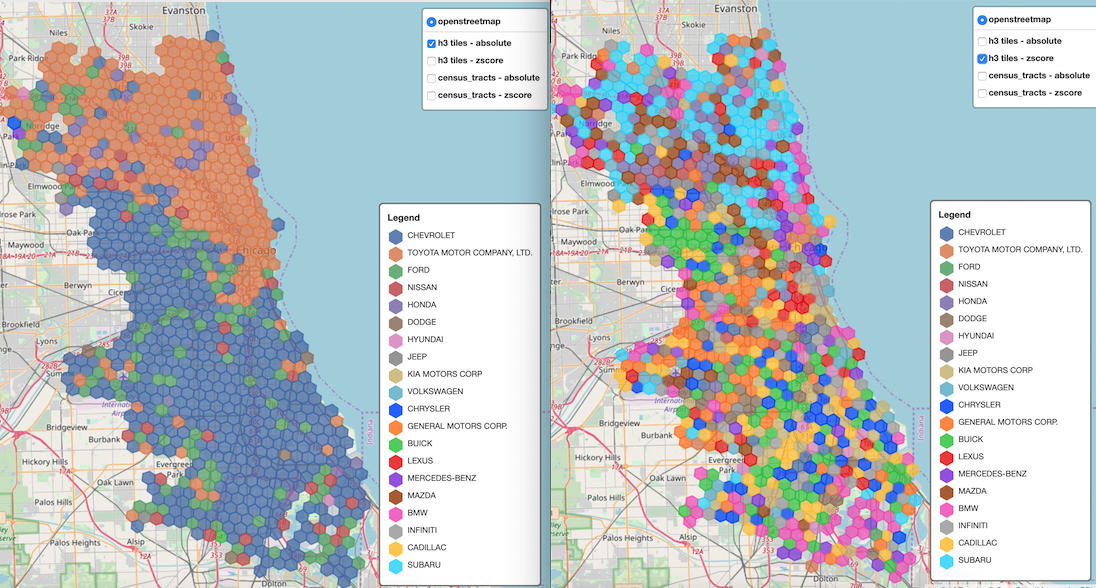

In [1]:
from IPython.display import Image
Image('../gallery/accidents_by_make_h3_categorical.png')

_A note on saving/rendering maps in Jupyter notebooks_   

- Option 1: Save to disk as an html file. Can be opened in a separate browser tab, or IFramed directly into the notebook. Will be interactive.  
```
from IPython.display import IFrame
m = h3df.to_choropleth('count')
m.save('accidents_by_h3_choropleth.html')  # Can manually open in a new browser window
IFrame(src='./accidents_by_h3_choropleth.html', width=700, height=600)
```
- Option 2: Render as png. Will not be interactive, but will render on Github. To use this option on your computer, you will need to install geckodriver. You can see download it [here](https://github.com/mozilla/geckodriver/releases) or by `brew install geckodriver`. 
```
from IPython.display import Image
m = h3df.to_choropleth('count')
Image(m._to_png())
```

In this Quickstart I will use option 2 so that it renders on Github.


In [2]:
import pandas as pd
import numpy as np
from shapely.geometry import shape
from geopandas import GeoDataFrame
import seaborn as sns
import folium 

from porygon import PorygonDataFrame
from porygon.plotting import _save_map_to_png
from porygon.data import load_chicago_traffic_accidents, load_chicago_census_tract_boundaries, load_chicago_L_stops
from porygon.utils import df_to_gpdf 

## Load data and construct a `PorygonDataFrame`.
Load 2019 traffic accident data downloaded from [Chicago Data Portal](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if).  
A `PorygonDataFrame` inherits from [`geopandas.GeoDataFrame`](http://geopandas.org/data_structures.html#geodataframe). In this case, we will use on of the several constructor methods, `from_h3`, to aggregate the >200,000 traffic accidents to hexagonal tiles from the [`h3`](https://uber.github.io/h3/#/) library. 

In [3]:
df = load_chicago_traffic_accidents()
df.head()

rd_no  crash_date   latitude  longitude   unit_type        make
0  JD100044  2019-12-31  41.871798 -87.696190      DRIVER     UNKNOWN
1  JD100044  2019-12-31  41.871798 -87.696190      PARKED   CHEVROLET
2  JD100044  2019-12-31  41.871798 -87.696190      PARKED        JEEP
3  JD100010  2019-12-31  41.812437 -87.743434      DRIVER  VOLKSWAGEN
4  JD100008  2019-12-31  41.887805 -87.765268  DRIVERLESS   CHEVROLET

In [4]:
vehicle_brand_dummies = pd.get_dummies(df.make)
top_brands = df.make.value_counts()[:21].index.tolist()
top_brands.remove('UNKNOWN')
df['count'] = 1
df_brands = pd.concat([df[['latitude', 'longitude', 'count']], vehicle_brand_dummies[top_brands]], axis=1)
h3df = PorygonDataFrame().from_h3(df_brands, h3_level=8, aggfunc=np.sum)
h3df.head()

/anaconda3/envs/porygon/lib/python3.7/site-packages/geopandas-0.6.2-py3.7.egg/geopandas/geodataframe.py:97: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  super(GeoDataFrame, self).__setattr__(attr, val)


count  CHEVROLET  TOYOTA MOTOR COMPANY, LTD.  FORD  NISSAN  \
id                                                                            
8826641903fffff     60          3                           2     7      10   
8826641905fffff      9          0                           1     0       2   
8826641907fffff     44          7                           1    13       4   
8826641909fffff      8          3                           0     1       0   
882664190bfffff      6          1                           0     1       2   

                 HONDA  DODGE  HYUNDAI  JEEP  KIA MOTORS CORP  ...  \
id                                                             ...   
8826641903fffff      0      3        1     2                3  ...   
8826641905fffff      1      0        0     0                1  ...   
8826641907fffff      2      1        0     2                1  ...   
8826641909fffff      0      0        0     1                0  ...   
882664190bfffff      0      0        0     0                0  ...   

                 GENERAL MOTORS CORP.  BUICK  LEXUS  MERCEDES-BENZ  MAZDA  \
id                                                                          
8826641903fffff                     0      1      1              0      0   
8826641905fffff                     0      0      0              1      0   
8826641907fffff                     1      1      0              0      0   
8826641909fffff                     0      0      0              0      0   
882664190bfffff                     0      0      0              0      0   

                 BMW  INFINITI  CADILLAC  SUBARU  \
id                                                 
8826641903fffff    1         2         3       0   
8826641905fffff    0         0         0       0   
8826641907fffff    0         0         0       0   
8826641909fffff    0         0         0       0   
882664190bfffff    0         0         0       0   

                                                          geometry  
id                                                                  
8826641903fffff  POLYGON ((-87.54767 41.67405, -87.55369 41.672...  
8826641905fffff  POLYGON ((-87.56377 41.68259, -87.56978 41.680...  
8826641907fffff  POLYGON ((-87.55905 41.67510, -87.56507 41.673...  
8826641909fffff  POLYGON ((-87.54571 41.68798, -87.55173 41.686...  
882664190bfffff  POLYGON ((-87.54100 41.68049, -87.54702 41.678...  

[5 rows x 22 columns]

# Plotting the `PorygonDataFrame`
A `PorygonDataFrame` has a number of built-in plotting methods that streamline and add functionality to existing folium tools. First, we will make a choropleth map. 


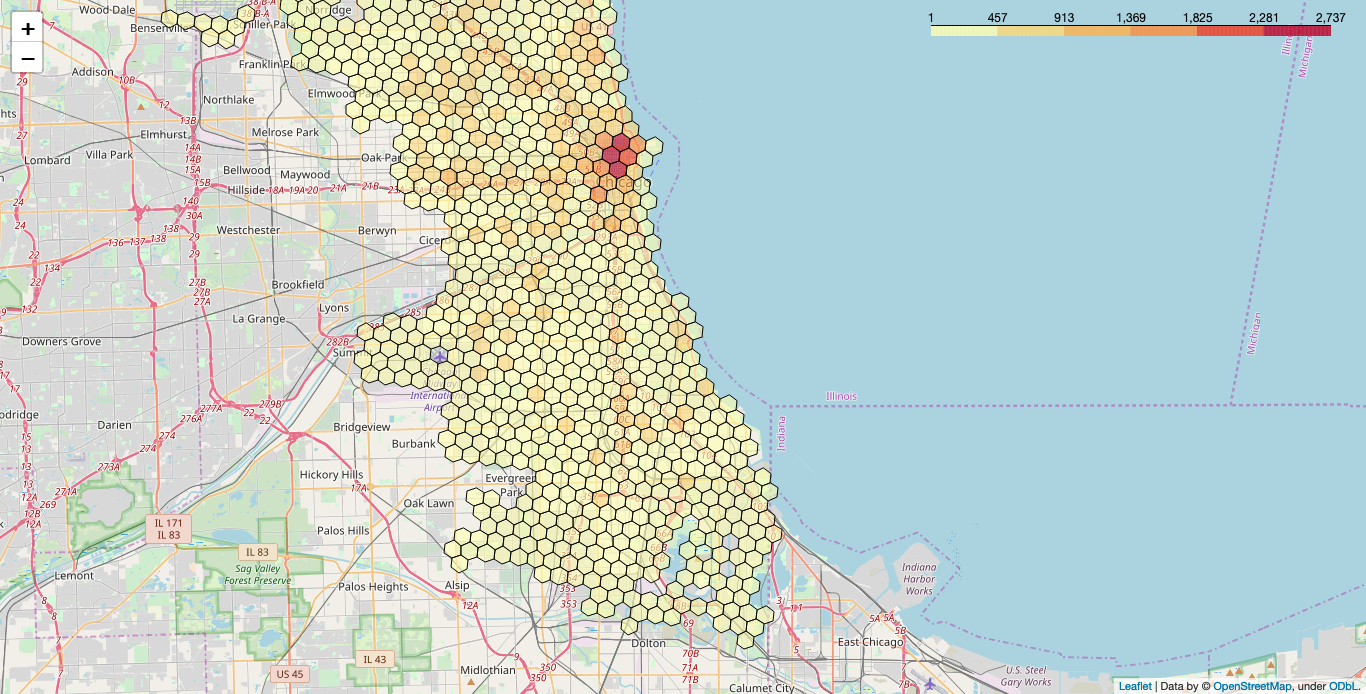

In [5]:
m = h3df.to_choropleth('count')
Image(m._to_png())

Notes on porygon/folium plotting:
- You can pass any of the standard [folium.Choropeth](https://python-visualization.github.io/folium/modules.html#folium.folium.Map.choropleth) keyword args (which correspond to those of [Leaflet](https://leafletjs.com/reference-1.5.0.html#map)) to customize your map if desired.   
`m = h3df.to_choropleth('count', bins=7, fill_color='Purples', legend_name='Traffic Accidents')`
- See top for discussion on saving html & rendering inline. Here is how you would do so
```
m = h3df.to_choropleth('count')
from IPython.display import IFrame 
m.save('accidents_by_h3_choropleth.html')
IFrame(src='./accidents_by_h3_choropleth.html', width=700, height=600)
```

Part of the strength of a `Porygon` is that it allows normal `pandas.DataFrame` manipulations that are immediately folium-ready. We will use this along with another `PorygonDataFrame` plotting method, `to_categorical_map`. 

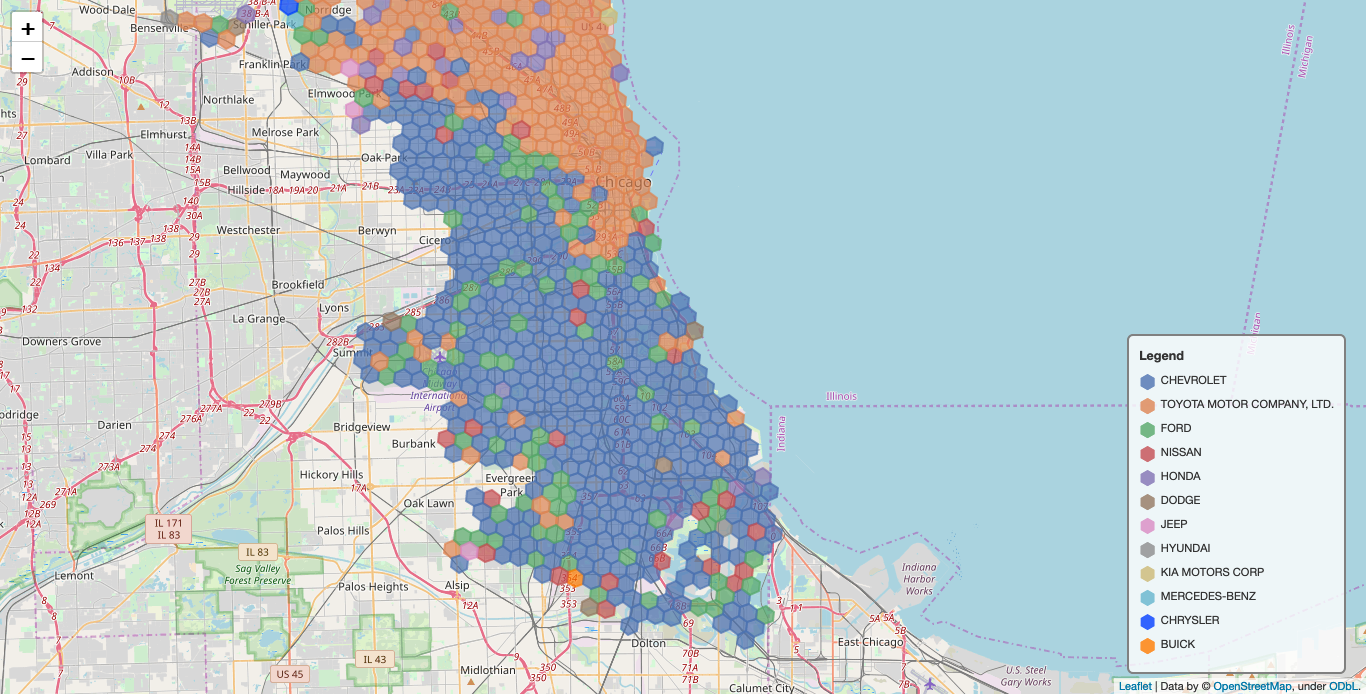

In [6]:
# Find the brand with the most crashes in each h3 tile
h3df['top_brand_val'] = h3df[top_brands].max(axis=1)
h3df['top_brand_name'] = h3df[top_brands].idxmax(axis=1)

m = h3df.to_categorical_map('top_brand_val', 'top_brand_name')
Image(m._to_png())

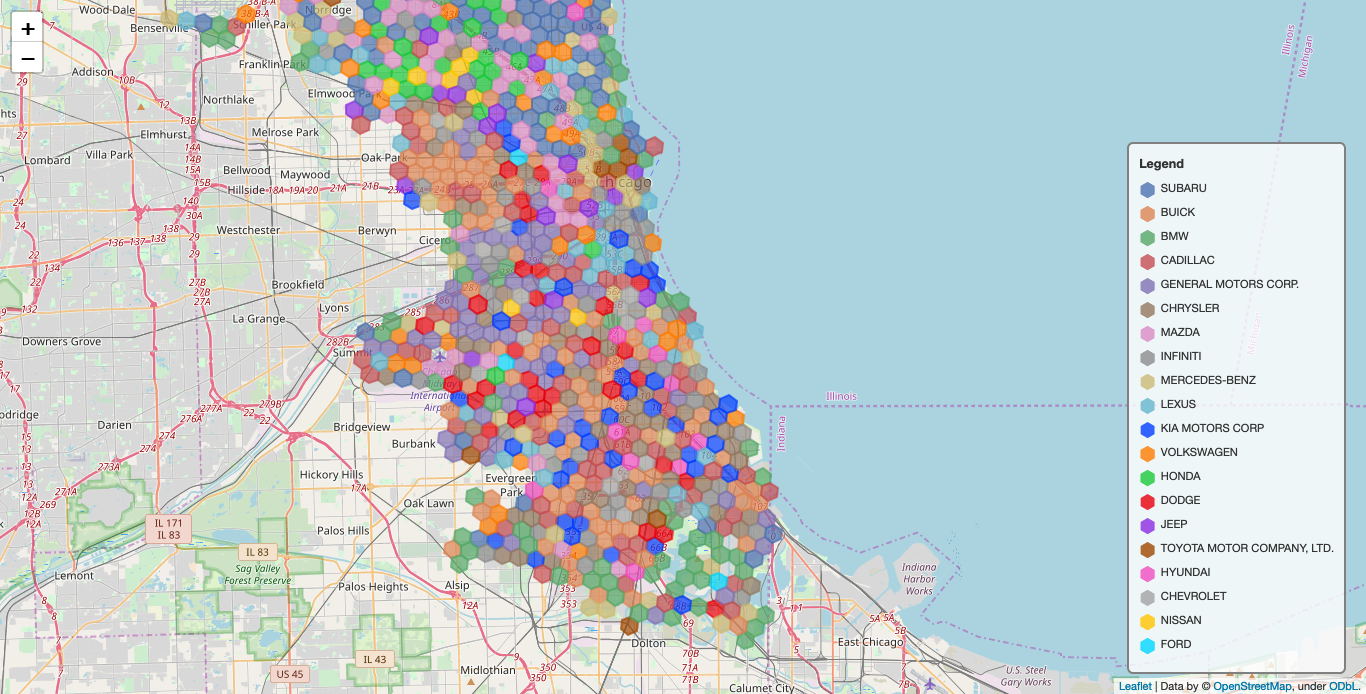

In [7]:
# Do the same, but with z scores rather than absolute values
zscore = lambda x: (x - x.mean()) / (x.std())
zscores = h3df[top_brands].copy()
for c in zscores.columns:
    zscores[c] = zscore(zscores[c])
    
h3df['top_brand_z_val'] = zscores.max(axis=1)
h3df['top_brand_z_name'] = zscores.idxmax(axis=1)

m = h3df.to_categorical_map('top_brand_z_val', 'top_brand_z_name')
Image(m._to_png())

## Using existing geographic boundaries 
Above, we use the h3 library to make hexagons which have convenient properties but do not represent real-world administrative boundaries. Next we will aggregate the traffic accidents to Chicago census tracts, downloaded from the [Chicago Data Portal](https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Census-Tracts-2010/5jrd-6zik).  

To use `PorygonDataFrame().from_boundaries()`, you must provide the geometries as a `geopandas.GeoDataFrame` with valid polygon `geometry` with index set to a unique `id` field. Any other fields (e.g. `census_name`) will be included in the final `PorygonDataFrame`. 

In [8]:
census_tracts = load_chicago_census_tract_boundaries()
boundaries = [shape(tract['the_geom']) for tract in census_tracts]
ids = [tract['geoid10'] for tract in census_tracts]
names = [tract['namelsad10'] for tract in census_tracts]
gpdf_census = GeoDataFrame({'geometry': boundaries, 'id': ids, 'census_name': names}).set_index('id')
gpdf_census.head()

geometry  \
id                                                               
17031842400  MULTIPOLYGON (((-87.62405 41.73022, -87.62405 ...   
17031840300  MULTIPOLYGON (((-87.68608 41.82296, -87.68607 ...   
17031841100  MULTIPOLYGON (((-87.62935 41.85280, -87.62934 ...   
17031841200  MULTIPOLYGON (((-87.68813 41.85569, -87.68816 ...   
17031839000  MULTIPOLYGON (((-87.63312 41.87449, -87.63306 ...   

                   census_name  
id                              
17031842400  Census Tract 8424  
17031840300  Census Tract 8403  
17031841100  Census Tract 8411  
17031841200  Census Tract 8412  
17031839000  Census Tract 8390

In [9]:
# NOTE - this take 10min on 200K records. For more, see the the Github [issue](https://github.com/zwrankin/porygon/issues/8)
cdf = PorygonDataFrame().from_boundaries(df_brands, gpdf_census)
cdf.head()

/anaconda3/envs/porygon/lib/python3.7/site-packages/geopandas-0.6.2-py3.7.egg/geopandas/geodataframe.py:97: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  super(GeoDataFrame, self).__setattr__(attr, val)


index  count  CHEVROLET  TOYOTA MOTOR COMPANY, LTD.  FORD  \
id                                                                       
17031010100      0  184.0       19.0                        24.0  18.0   
17031010201      1  336.0       21.0                        63.0  25.0   
17031010202      2  245.0       14.0                        52.0  13.0   
17031010300      3  233.0       12.0                        38.0  18.0   
17031010400      4  360.0       33.0                        59.0  31.0   

             NISSAN  HONDA  DODGE  HYUNDAI  JEEP  ...  BUICK  LEXUS  \
id                                                ...                 
17031010100    21.0   13.0    3.0      7.0   4.0  ...    1.0    1.0   
17031010201    22.0   39.0   14.0      7.0   7.0  ...    2.0    6.0   
17031010202    19.0   20.0   13.0      9.0  10.0  ...    1.0    4.0   
17031010300    19.0   22.0   13.0     13.0   8.0  ...    4.0    1.0   
17031010400    29.0   32.0   14.0     17.0  11.0  ...    2.0    6.0   

             MERCEDES-BENZ  MAZDA  BMW  INFINITI  CADILLAC  SUBARU  \
id                                                                   
17031010100            1.0    2.0  1.0       0.0       1.0     1.0   
17031010201            3.0    5.0  6.0       2.0       1.0     9.0   
17031010202            3.0    7.0  6.0       1.0       1.0     3.0   
17031010300            3.0    3.0  4.0       1.0       0.0     7.0   
17031010400            7.0   10.0  5.0       4.0       1.0     5.0   

                                                      geometry  \
id                                                               
17031010100  MULTIPOLYGON (((-87.66368 42.01940, -87.66384 ...   
17031010201  MULTIPOLYGON (((-87.68010 42.01254, -87.68027 ...   
17031010202  MULTIPOLYGON (((-87.67336 42.01937, -87.67311 ...   
17031010300  MULTIPOLYGON (((-87.66506 42.01280, -87.66543 ...   
17031010400  MULTIPOLYGON (((-87.65080 41.99849, -87.65500 ...   

                     census_name  
id                                
17031010100     Census Tract 101  
17031010201  Census Tract 102.01  
17031010202  Census Tract 102.02  
17031010300     Census Tract 103  
17031010400     Census Tract 104  

[5 rows x 24 columns]

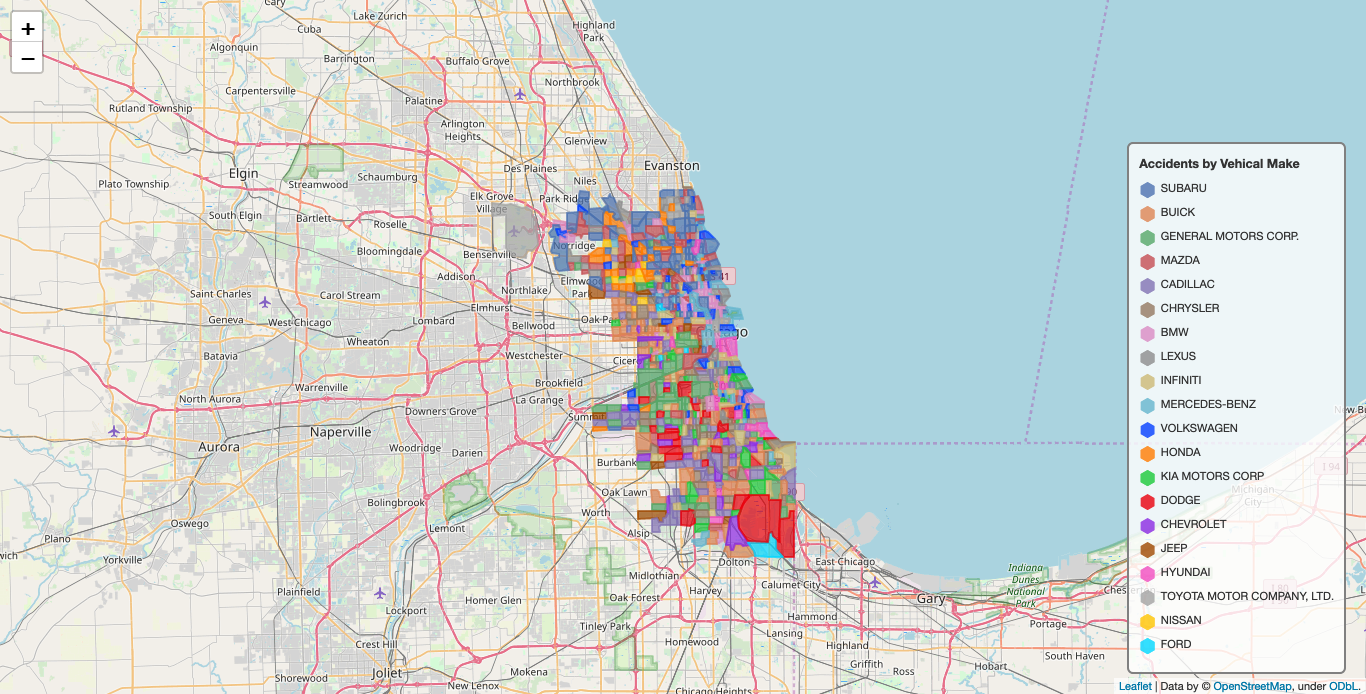

In [10]:
zscores = cdf[top_brands].copy()
for c in zscores.columns:
    zscores[c] = zscore(zscores[c])

cdf['top_brand_val'] = cdf[top_brands].max(axis=1)
cdf['top_brand_name'] = cdf[top_brands].idxmax(axis=1)
cdf['top_brand_z_val'] = zscores.max(axis=1)
cdf['top_brand_z_name'] = zscores.idxmax(axis=1)

m = cdf.to_categorical_map('top_brand_z_val', 'top_brand_z_name', legend_title='Accidents by Vehical Make')
Image(m._to_png())

# Final Layered Map
Because the plotting methods of `PorygonDataFrame` return instances of `folium.folium.Map`, it is easy to integrate with other folium functionalities such as layering.  
First, we will create a `color_key` to pass to the `to_categorical_map` method because the defaults (which were used in the above plots) may not be consistent between the census and h3 polygons. 

In [11]:
colors = sns.color_palette('deep', 10).as_hex() + sns.color_palette('bright', 10).as_hex()
color_key = dict(zip(top_brands, colors))
color_key

{'CHEVROLET': '#4c72b0',
 'TOYOTA MOTOR COMPANY, LTD.': '#dd8452',
 'FORD': '#55a868',
 'NISSAN': '#c44e52',
 'HONDA': '#8172b3',
 'DODGE': '#937860',
 'HYUNDAI': '#da8bc3',
 'JEEP': '#8c8c8c',
 'KIA MOTORS CORP': '#ccb974',
 'VOLKSWAGEN': '#64b5cd',
 'CHRYSLER': '#023eff',
 'GENERAL MOTORS CORP.': '#ff7c00',
 'BUICK': '#1ac938',
 'LEXUS': '#e8000b',
 'MERCEDES-BENZ': '#8b2be2',
 'MAZDA': '#9f4800',
 'BMW': '#f14cc1',
 'INFINITI': '#a3a3a3',
 'CADILLAC': '#ffc400',
 'SUBARU': '#00d7ff'}

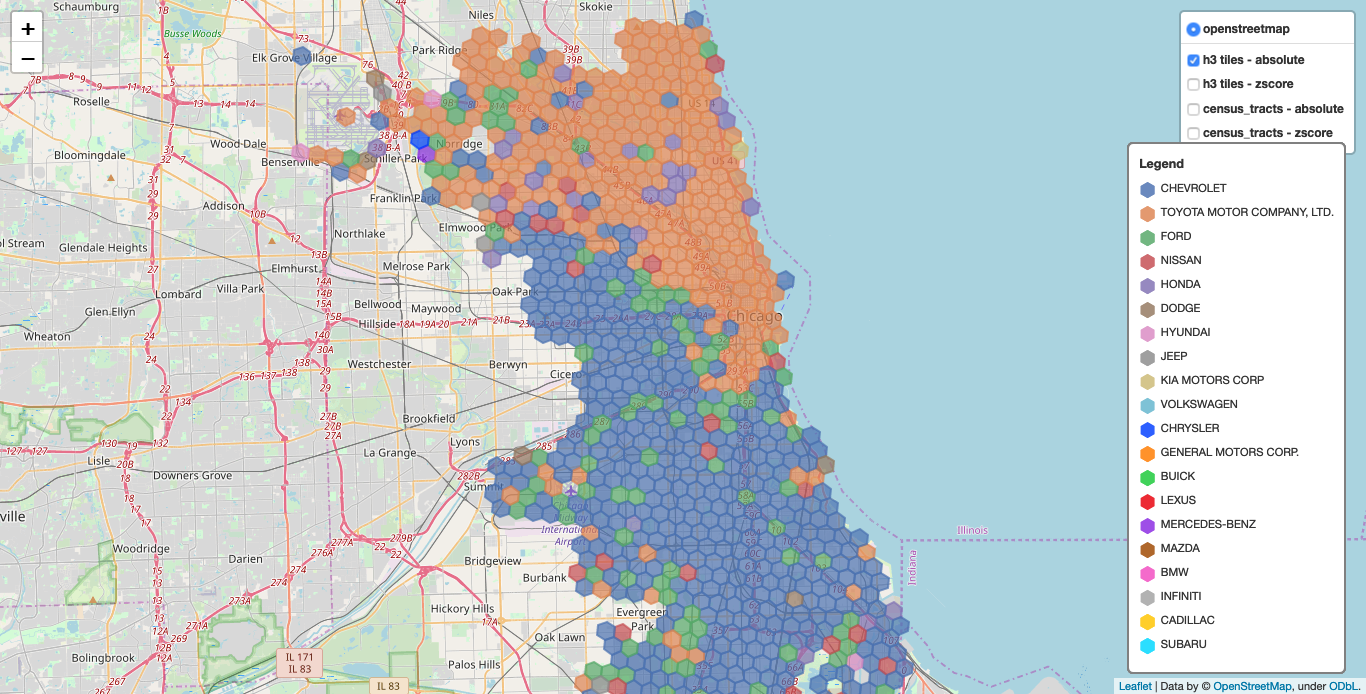

In [12]:
m = folium.Map(location=df[['latitude', 'longitude']].mean(), zoom_start=11) 

fg = folium.FeatureGroup(name='h3 tiles - absolute', show=True)
h3df.to_categorical_map('top_brand_val', 'top_brand_name', m=fg, color_key=color_key, legend_title='Legend')
m.add_child(fg)

fg = folium.FeatureGroup(name='h3 tiles - zscore', show=False)
h3df.to_categorical_map('top_brand_z_val', 'top_brand_z_name', m=fg, color_key=color_key, legend_title='Legend')
m.add_child(fg)

fg = folium.FeatureGroup(name='census_tracts - absolute', show=False)
cdf.to_categorical_map('top_brand_val', 'top_brand_name', m=fg, color_key=color_key, legend_title='Legend')
m.add_child(fg)

fg = folium.FeatureGroup(name='census_tracts - zscore', show=False)
cdf.to_categorical_map('top_brand_z_val', 'top_brand_z_name', m=fg, color_key=color_key, legend_title='Legend')
m.add_child(fg)

m.add_child(folium.LayerControl(collapsed=False))
m.save('../gallery/chicago_accidents.html')
# IFrame(src='../gallery/chicago_accidents.html', width=700, height=600)
Image(m._to_png())